In [3]:
import numpy as np
import pandas as pd
import json

In [7]:
json_array = []

# Open the file and read it line by line
with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        # Parse each line as a JSON object and append to the list
        json_obj = json.loads(line.strip())  # strip() removes any leading/trailing whitespace
        json_array.append(json_obj)

In [10]:
json_array[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

In [133]:
city_biz_counts = {}

for obj in json_array:
    city = obj['city']
    if city in city_biz_counts:
        city_biz_counts[city] += 1
    else:
        city_biz_counts[city] = 1
print(city_biz_counts)


city_biz_counts = sorted(city_biz_counts.items(), key=lambda x: x[1], reverse=True)
print(city_biz_counts)

{'Santa Barbara': 3829, 'Affton': 36, 'Tucson': 9250, 'Philadelphia': 14569, 'Green Lane': 10, 'Ashland City': 41, 'Brentwood': 767, 'St. Petersburg': 1185, 'Nashville': 6971, "Land O' Lakes": 97, 'Tampa Bay': 141, 'Indianapolis': 7540, 'Clearwater': 2221, 'Largo': 1002, 'New Orleans': 6209, 'Kenner': 584, 'Edmonton': 5054, 'Reno': 5935, 'Newtown': 322, 'White House': 74, 'Boise': 2937, 'Paoli': 152, 'Ardmore': 376, 'Exton': 419, 'Wilmington': 1446, 'Edwardsville': 274, 'Sparks': 1624, 'Alton': 150, 'Cherry Hill': 960, 'Bala Cynwyd': 202, 'Springfield': 384, 'Belleville': 302, 'Carmel': 967, 'Tampa': 9050, 'Kennett Square': 175, 'Plymouth Meeting': 199, 'Harvey': 289, 'West Chester': 838, 'Meridian': 1043, 'Hudson': 228, 'Fernley': 1, 'Williamstown': 112, 'Pinellas Park': 512, 'Glenolden': 64, 'Wesley Chapel': 560, 'Fishers': 570, 'Burlington': 177, 'Troy': 50, 'Camden': 108, 'Plainfield': 271, 'Bensalem': 454, 'Maplewood': 134, 'Saint Louis': 4827, 'Fairview Heights': 241, 'Oro Valley

In [27]:
Phil_only = [obj for obj in json_array if obj['city'] == 'Philadelphia']
len(Phil_only)

14569

In [90]:
Phil_cat_count = {}

for obj in Phil_only:
    cat = obj['categories']
    if cat in Phil_cat_count:
        Phil_cat_count[cat] += 1
    else:
        Phil_cat_count[cat] = 1

Phil_cat = sorted(Phil_cat_count.items(), key=lambda x: x[1], reverse=True)
Phil_cat

[('Restaurants, Pizza', 154),
 ('Pizza, Restaurants', 124),
 ('Restaurants, Chinese', 89),
 ('Nail Salons, Beauty & Spas', 86),
 ('Chinese, Restaurants', 84),
 ('Beauty & Spas, Hair Salons', 80),
 ('Beauty & Spas, Nail Salons', 79),
 ('Hair Salons, Beauty & Spas', 79),
 ('Food, Coffee & Tea', 50),
 ('Coffee & Tea, Food', 50),
 ('Restaurants, Italian', 43),
 ('Restaurants, Mexican', 42),
 ('Mexican, Restaurants', 39),
 ('Italian, Restaurants', 39),
 ('Food, Grocery', 37),
 ('Restaurants, American (New)', 36),
 ('American (New), Restaurants', 34),
 ('Auto Repair, Automotive', 33),
 ('Food, Beer, Wine & Spirits', 33),
 ('Automotive, Auto Repair', 31),
 ('Banks & Credit Unions, Financial Services', 30),
 ('Barbers, Beauty & Spas', 28),
 ('Grocery, Food', 28),
 ('Beer, Wine & Spirits, Food', 27),
 ('Parking, Automotive', 25),
 ('Automotive, Parking', 25),
 ('Restaurants, Vietnamese', 24),
 ('Restaurants', 23),
 ('Breakfast & Brunch, Restaurants', 22),
 ('Food, Ice Cream & Frozen Yogurt', 22

In [110]:
Phil_mixed_hotel = []
for obj in Phil_only:
    if(obj['categories']):
        if('Hotels' in obj['categories'].strip()):
            Phil_mixed_hotel.append(obj)
len(Phil_mixed_hotel)

392

In [111]:
Phil_hotel = []
for hotel in Phil_mixed_hotel:
    cat = hotel['categories'].strip().split(',')
    print(cat)
    print("==========")
    for i in cat:
        if i == 'Hotels':
            Phil_hotel.append(hotel)

len(Phil_hotel)

['Buses', ' Transportation', ' Bus Tours', ' Hotels & Travel', ' Travel Agents', ' Travel Services', ' Airport Shuttles', ' Tours', ' Public Transportation']
['Local Flavor', ' Team Building Activities', ' Active Life', ' Arts & Entertainment', ' Event Planning & Services', ' Walking Tours', ' Scavenger Hunts', ' Museums', ' Hotels & Travel', ' Tours']
['Tours', ' Walking Tours', ' Hotels & Travel', ' Food Tours']
['Event Planning & Services', ' Hotels & Travel', ' Hotels', ' Venues & Event Spaces']
['Hotels & Travel', ' Tours']
['Car Dealers', ' Auto Parts & Supplies', ' Auto Repair', ' Hotels & Travel', ' Automotive', ' Car Rental']
['Hotels & Travel', ' Automotive', ' Car Rental', ' Truck Rental']
['Hotels & Travel', ' Event Planning & Services', ' Hotels']
['Hotels', ' Event Planning & Services', ' Hotels & Travel', ' Caterers']
['Tours', ' Local Flavor', ' Hotels & Travel']
['Venues & Event Spaces', ' Hotels', ' Event Planning & Services', ' Hotels & Travel']
['Hotels & Travel', '

31

In [149]:
Phil_hotel = sorted(Phil_hotel, key=lambda x: x['stars'], reverse=True)
df_Phil_hotel = pd.DataFrame(Phil_hotel)
df_Phil_hotel.to_csv('Phil_hotel.csv')
df_Phil_hotel # 31 hotels in Philadelphia

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,M4y3CIkX3uG9HPN4ZNqD_g,The Franklin Residences,834 Chestnut St,Philadelphia,PA,19107,39.949383,-75.155131,5.0,8,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Event Planning & Services, Home Servic...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,KGBjEO-FilXoCK_Pk-jsvA,Penn's View Hotel,14 N Front St,Philadelphia,PA,19106,39.950201,-75.142285,4.0,108,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,dSdnWJxvhLwvsDfRI1lKuQ,Residence Inn Philadelphia Airport,3701 Island Ave,Philadelphia,PA,19153,39.895753,-75.236302,4.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,jMqEQYBIztLtcvnTujfHUA,Hyatt Centric Center City Philadelphia,1620 Chancellor St,Philadelphia,PA,19103,39.949305,-75.168937,4.0,29,1,"{'DogsAllowed': 'True', 'BusinessAcceptsBitcoi...","Hotels, Event Planning & Services, Venues & Ev...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,4UZgIeaRWuOj3Z6LNMyaDA,Morris House Hotel,225 S 8th St,Philadelphia,PA,19106,39.947369,-75.154287,4.0,57,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '6:0-5:30', 'Tuesday': '6:0-5:30', ..."
5,NK0_YatQwVmIFJJyrdNNpQ,The Study at University City,20 S 33rd St,Philadelphia,PA,19104,39.954406,-75.190059,4.0,53,1,"{'WiFi': ''free'', 'RestaurantsPriceRange2': '...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
6,xKyIOJsQdB387ESxUJhWxw,Rittenhouse 1715,1715 Rittenhouse Sq,Philadelphia,PA,19103,39.948445,-75.170065,4.0,37,0,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
7,pFMGXlE1NwEXYPBgw3kRnA,Southern Inn,5741 Woodland Ave,Philadelphia,PA,19143,39.932687,-75.224558,4.0,12,1,"{'Ambience': '{'romantic': False, 'intimate': ...","Hotels, Event Planning & Services, Restaurants...",None
8,s1PNBO9o5jIgNd5YWUDLXQ,The Independent Hotel,1234 Locust St,Philadelphia,PA,19107,39.947781,-75.162146,3.5,123,0,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
9,TZhCpOoo4TIg7dgftWNKyQ,W Philadelphia,1439 Chestnut St,Philadelphia,PA,19102,39.951520,-75.165062,3.5,8,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [150]:
Phil_muesum = []
for obj in Phil_only:
    if(obj['categories']):
        if 'Museum' in obj['categories']:
            Phil_muesum.append(obj)
Phil_muesum = sorted(Phil_muesum, key=lambda x: x['stars'], reverse=True)
df_Phil_muesum = pd.DataFrame(Phil_muesum)
df_Phil_muesum.to_csv('Phil_muesum.csv')

In [151]:
Phil_restaurant = []
for obj in Phil_only:
    if(obj['categories']):
        if 'Restaurants' in obj['categories'].strip():
            Phil_restaurant.append(obj)
Phil_restaurant = sorted(Phil_restaurant, key=lambda x: x['stars'], reverse=True)
df_Phil_restaurant = pd.DataFrame(Phil_restaurant)
df_Phil_restaurant.to_csv('Phil_restaurant.csv')

In [154]:
Counter = 0
for obj in Phil_only:
    if(obj['categories']):
        if 'Restaurants' in obj['categories'].strip():
            Counter += 1
Counter

5852

In [156]:
Phil_food = []
for obj in Phil_only:
    if(obj['categories']):
        if 'Food' in obj['categories'].strip():
            Phil_food.append(obj)
Phil_food = sorted(Phil_food, key=lambda x: x['stars'], reverse=True)
df_Phil_food = pd.DataFrame(Phil_food)
df_Phil_food.to_csv('Phil_food.csv')

In [157]:
Phil_restaurant_food = []
for obj in Phil_only:
    if(obj['categories']):
        if ('Food' in obj['categories'].strip()) or ('Restaurants' in obj['categories'].strip()):
            Phil_restaurant_food.append(obj)
Phil_restaurant_food = sorted(Phil_restaurant_food, key=lambda x: x['stars'], reverse=True)
df_Phil_restaurant_food = pd.DataFrame(Phil_restaurant_food)
df_Phil_restaurant_food.to_csv('Phil_restaurant_food.csv')

In [6]:
df_Phil_restaurant_food = pd.read_csv('Phil_restaurant_food.csv')
df_Phil_restaurant_food['review_count'].describe()

count    7076.000000
mean      101.132419
std       224.279623
min         5.000000
25%        12.000000
50%        32.000000
75%        95.000000
max      5721.000000
Name: review_count, dtype: float64

Matplotlib is building the font cache; this may take a moment.


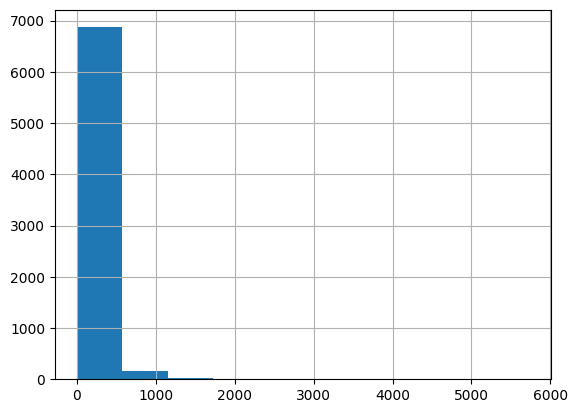

In [9]:
count = df_Phil_restaurant_food[df_Phil_restaurant_food['review_count'] > 100].shape[0]
print(count)

In [43]:
border = 200
count = df_Phil_restaurant_food[df_Phil_restaurant_food['review_count'] > border].shape[0]
count_ = df_Phil_restaurant_food[df_Phil_restaurant_food['review_count'] <= border].shape[0]
print(1- count/count_)

0.851112193537912


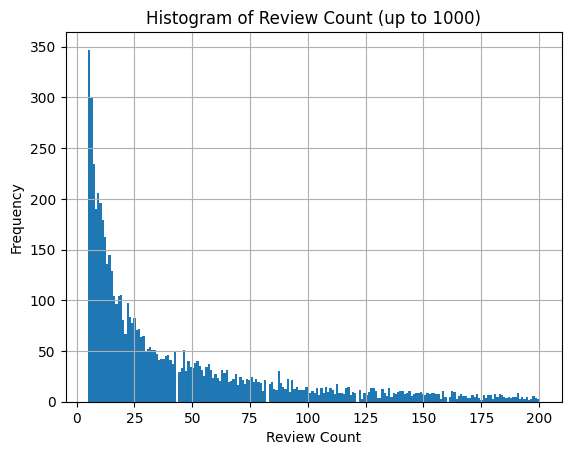

In [42]:
df_Phil_restaurant_food[df_Phil_restaurant_food['review_count']<=200]['review_count'].hist(bins=200)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram of Review Count (up to 1000)')
plt.show()

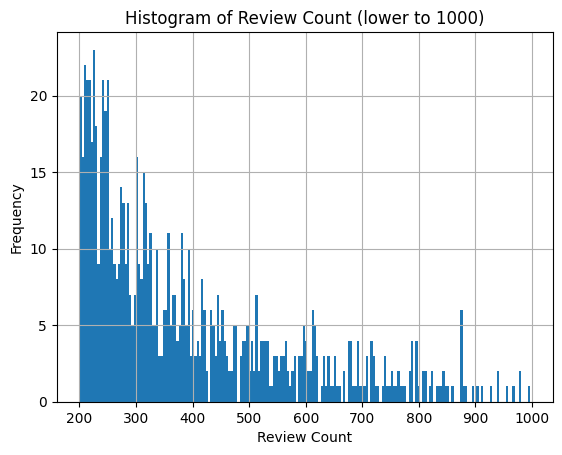

In [36]:
df_Phil_restaurant_food[(df_Phil_restaurant_food['review_count']>=200) & (df_Phil_restaurant_food['review_count']<=1000)]['review_count'].hist(bins=200)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram of Review Count (lower to 1000)')
plt.show()